In [167]:
import numpy as np
import yt
import ytree
import math
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = plt.get_cmap("gist_rainbow")

In [169]:
#hds= yt.load('rockstar_halos/halo_samples/halos_DD0093.0.bin')
#hds2 = yt.load('rockstar_halos/out_files/out_57.list')
#halos = hds.all_data()
all_trees = ytree.load('rockstar_halos/trees/tree_0_0_0.dat')

# Trying to recover MM and LW using Orig_halo_ID

In [170]:
orig_id = all_trees["Orig_halo_ID"]
orig_MM_id = 24208
orig_LW_id = 92275
MM_index = list(orig_id).index(orig_MM_id)
LW_index = list(orig_id).index(orig_LW_id)

Reading root fields: 100%|███████████████████████████████████████████████████| 122578/122578 [00:14<00:00, 8705.21it/s]


In [171]:
LW_tree = all_trees[LW_index]
MM_tree = all_trees[MM_index]

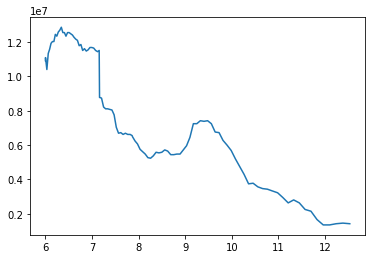

In [172]:
plt.plot(MM_tree['prog', 'redshift'], MM_tree['prog','mass'].to("Msun"))

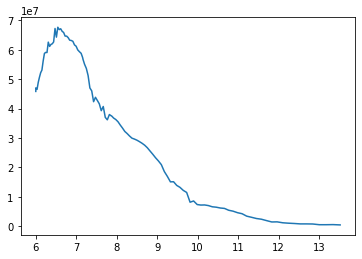

In [173]:
plt.plot(LW_tree['prog', 'redshift'], LW_tree['prog','mass'].to("Msun"))

# ^^ Both of these (MM and LW) have a peak mass on the order of 10^7 M_sol, where as Raymond's data has them both on the order of 10^11

# Manually finding the most massive halo in the new tree file

In [188]:
all_mass = all_trees['mass']
actual_MM_index = np.argmax(all_mass)
actual_MM_tree = all_trees[actual_MM_index]
MMm = actual_MM_tree['prog', 'mass'].to("Msun")
MMz = actual_MM_tree['prog', 'redshift']

In [185]:
actual_MM_tree["Orig_halo_ID"]

72102

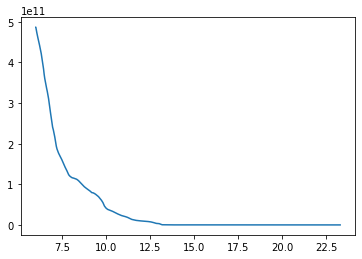

In [189]:
plt.plot(MMz, MMm)

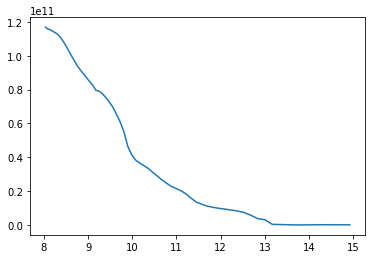

In [193]:
#filtering to match raymond's z-range for a better comparison
f1 = MMz < 16
f2 = MMz > 8
f = f1&f2
plt.plot(MMz[f], MMm[f])


# Raymond's Data, supposedly the original MM

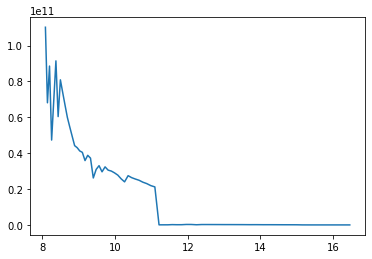

In [195]:
#Raymond's Old MM
MM=[   [16.455053237912374, 16.179178835251676, 15.909029421711196, 15.65278934221482, 15.406890894175554, 15.155088852988694, 15.0, 14.926102882624622, 14.703517587939698, 14.489467162329614, 14.28117359413203, 14.080681646810437, 13.887598630340927, 13.699397324709688, 13.518002322880372, 13.34102968593145, 13.17032733456143, 13.003640946646128, 12.84083044982699, 12.685507048036131, 12.531799729364007, 12.383297644539615, 12.239772275916854, 12.099292638197536, 11.961762799740765, 11.828736369467606, 11.698412698412698, 11.572290671360323, 11.448649321548611, 11.32741617357002, 11.21001221001221, 11.094823415578132, 10.983223487118035, 10.872254541137362, 10.76470588235294, 10.66044776119403, 10.55802126675913, 10.457378551787352, 10.359763716914689, 10.262529564140106, 10.169440411035408, 10.076650420912715, 9.986596352450011, 9.897994768962512, 9.81081081081081, 9.726161106939827, 9.642826734780758, 9.560777273207309, 9.481081647626036, 9.402579839800271, 9.325245224574083, 9.24905196269345, 9.175010175010174, 9.1010101010101, 9.029084344599339, 8.959167413604224, 8.889240506329113, 8.821253191907289, 8.754194303550527, 8.688983625617674, 8.6237128284092, 8.560229445506693, 8.497578117580018, 8.435742592942065, 8.374707040404987, 8.315323707498836, 8.256687957048968, 8.198785760279643, 8.141603437242892, 8.08595311648192],             [7625352.112676057, 8839436.619718311, 7521126.760563381, 8145070.422535212, 7036619.71830986, 18887323.943661973, 80098591.54929578, 85690140.84507044, 96323943.66197184, 106619718.30985917, 120971830.9859155, 118436619.71830986, 148591549.29577467, 139436619.71830988, 165352112.67605636, 173380281.69014087, 183380281.69014087, 184647887.32394367, 200140845.07042256, 209436619.71830988, 218028169.01408452, 217464788.7323944, 96816901.40845071, 250140845.07042256, 259859154.9295775, 125859154.92957747, 117225352.11267607, 170000000.0, 64126760.563380286, 59521126.76056339, 54901408.45070423, 21197183098.591553, 21915492957.74648, 23042253521.126762, 23830985915.492958, 24901408450.704227, 25591549295.77465, 26352112676.05634, 27450704225.352116, 24014084507.042255, 25676056338.02817, 27760563380.281693, 29014084507.042255, 30028169014.08451, 30535211267.605637, 32366197183.098595, 29605633802.816902, 33028169014.08451, 30943661971.83099, 26183098591.549297, 37239436619.718315, 38802816901.408455, 35873239436.61972, 40464788732.39437, 41253521126.76057, 43056338028.16902, 44197183098.59155, 49464788732.39437, 54718309859.15494, 59985915492.95775, 66957746478.873245, 73915492957.74649, 80887323943.66197, 60394366197.183105, 91450704225.35213, 69380281690.14085, 47309859154.92958, 88563380281.69016, 68084507042.253525, 110197183098.59155],          [7625352.112676057, 8839436.619718311, 7521126.760563381, 11646478.873239437, 75323943.66197184, 82661971.83098592, 87422535.21126762, 81070422.53521128, 96323943.66197184, 106619718.30985917, 120971830.9859155, 118436619.71830986, 148591549.29577467, 139436619.71830988, 165352112.67605636, 173380281.69014087, 183380281.69014087, 184647887.32394367, 200140845.07042256, 209436619.71830988, 218028169.01408452, 217464788.7323944, 96816901.40845071, 250140845.07042256, 259859154.9295775, 125859154.92957747, 117225352.11267607, 220422535.21126762, 64126760.563380286, 19647887323.943665, 20225352112.67606, 21197183098.591553, 21915492957.74648, 23042253521.126762, 23830985915.492958, 24901408450.704227, 25591549295.77465, 26352112676.05634, 27450704225.352116, 24014084507.042255, 25676056338.02817, 27760563380.281693, 29014084507.042255, 30028169014.08451, 30535211267.605637, 32366197183.098595, 29605633802.816902, 33028169014.08451, 30943661971.83099, 26183098591.549297, 37239436619.718315, 38802816901.408455, 35873239436.61972, 40464788732.39437, 41253521126.76057, 43056338028.16902, 44197183098.59155, 49464788732.39437, 65605633802.81691, 59985915492.95775, 77816901408.45071, 73915492957.74649, 80887323943.66197, 88352112676.05635, 91450704225.35213, 93563380281.69016, 98436619718.30986, 101704225352.11269, 104957746478.87325, 110197183098.59155], [ 0, 0, 0, 0.004822789649155053, 0.007368459811927571, 0.0074099730093987425, 0.0031429444793061754, 0.005329971857335843, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.009597364221492762, 0, 0.05562099783355257, 0.05977221177102313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.015726452238187815, 0, 0.0647683178722449, 0, 0, 0.0268183034511894, 0, 0.010622678569929506, 0.03232852919636058, 0.06172105151405045, 0.02866559959254286, 0 ]   ]
MMz_raymond=MM[0]
MMm_raymond=MM[1]
plt.plot(MMz_raymond, MMm_raymond)

# Recreating John's notebook, but with the new data and a different halo_DD00## file
(old notebook found at https://nbviewer.org/urls/dl.dropbox.com/s/rkmu4dta6khru1z/HaloMatch.ipynb)

In [199]:
hds = yt.load('rockstar_halos/halo_samples/halos_DD0057.0.bin')
halos = hds.all_data()

yt : [INFO     ] 2021-10-27 15:30:32,898 Parameters: current_time              = 1.0906914243752802e+16 s
yt : [INFO     ] 2021-10-27 15:30:32,900 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-10-27 15:30:32,902 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-10-27 15:30:32,904 Parameters: domain_right_edge         = [28.39999962 28.39999962 28.39999962]
yt : [INFO     ] 2021-10-27 15:30:32,906 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-10-27 15:30:32,907 Parameters: current_redshift          = 12.841682381741952
yt : [INFO     ] 2021-10-27 15:30:32,908 Parameters: omega_lambda              = 0.734000027179718
yt : [INFO     ] 2021-10-27 15:30:32,910 Parameters: omega_matter              = 0.26600000262260437
yt : [INFO     ] 2021-10-27 15:30:32,911 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-10-27 15:30:32,913 Parameters: hubble_constant           = 0.7099999785423279
yt : [INFO     ] 2021-10-2

In [215]:
mm = halos['particle_mass'].argsort()[-3]
halo_id = halos['particle_identifier'][mm]
print('Halo: ID = %d, Mvir = %.3g Msun, position = %s' % (halo_id, halos['particle_mass'][mm].to('Msun'), halos['particle_position'][mm].to('Mpccm/h')))

Halo: ID = 50532, Mvir = 3.75e+09 Msun, position = [14.31444454 15.24769402 15.18759346] Mpccm/h


In [216]:
ind = list(all_trees['Orig_halo_ID']).index(halo_id)
tree = all_trees[ind]

In [217]:
print('Halo in tree: ID = %d, Orig_halo_ID = %d, Mvir = %.3g Msun, position = %s' % (tree['id'], tree['Orig_halo_ID'], tree['mass'].to('Msun'), tree['position']))
#.to("Mpcccm/h") throws an error?
print(tree['prog', 'redshift'])

Halo in tree: ID = 22285113, Orig_halo_ID = 50532, Mvir = 5.55e+05 Msun, position = [0.48415738 0.5294641  0.5366363 ] unitary
[5.9998603 6.0018206 6.030865  6.0606513 6.0901875 6.120478  6.1510296
 6.181844  6.2129254 6.2442765 6.2764316 6.3083386 6.3410664 6.3740873
 6.4074073 6.4404764 6.474959 ]


In [243]:
#Doesn't match...

In [224]:
f = open("redshift.dat", "r")
TRUNC = False
redshift = []
for line in f:
    if("DD0057" in line): print(line)
    r = float(line.split("=")[-1])
    if(TRUNC): r = math.trunc(r*1000)/1000
    redshift.append(r)
my_redshift = redshift[::-1]
print(redshift[::-1])
raymonds_redshift = MMz_raymond[::-1]


DD0057/output_0057:CosmologyCurrentRedshift    = 12.841682882839

[5.9999999999314, 6.00182572471, 6.0310505783656, 6.060578241502, 6.0904180526453, 6.1205746557887, 6.151050851553, 6.1818541678826, 6.2129908554266, 6.2444648015836, 6.276282587808, 6.3084515438889, 6.3409764648542, 6.3738634572239, 6.407120756727, 6.4407538964615, 6.4747689649277, 6.5091749450858, 6.5439779567018, 6.5791845149641, 6.6148042000375, 6.6508435836448, 6.6873100394577, 6.7242136176595, 6.7615612124113, 6.7993614829173, 6.8376248339733, 6.8763583723584, 6.9155724651738, 6.9552777660434, 6.9954814989135, 7.0361961591281, 7.0774320719232, 7.119198742416, 7.1537298113887, 7.1615089852115, 7.1615089852115, 7.1651538266651, 7.2043719355453, 7.2478000375743, 7.2918068567508, 7.3364022011054, 7.3816011048155, 7.42741614696, 7.4738598449224, 7.5209481667078, 7.5686931496502, 7.6171114793854, 7.6662179868359, 7.7160276532908, 7.7665586460823, 7.817825054907, 7.8602752501595, 7.8698468602314, 7.922640446287, 7.9762248

In [225]:
l1 = my_redshift
l2 = raymonds_redshift
best = 10
for x in l1:
    for y in l2:
        dif = abs(x-y)
        if(dif< best): 
            best = dif
            l1_best = x
            l2_best = y
print(best, l1_best, l2_best)

9.63430138511967e-06 14.489476796631 14.489467162329614


In [226]:
#find the DD048 corresponds to redshift 14.48 in my dataset

In [223]:
print(raymonds_redshift)

[8.08595311648192, 8.141603437242892, 8.198785760279643, 8.256687957048968, 8.315323707498836, 8.374707040404987, 8.435742592942065, 8.497578117580018, 8.560229445506693, 8.6237128284092, 8.688983625617674, 8.754194303550527, 8.821253191907289, 8.889240506329113, 8.959167413604224, 9.029084344599339, 9.1010101010101, 9.175010175010174, 9.24905196269345, 9.325245224574083, 9.402579839800271, 9.481081647626036, 9.560777273207309, 9.642826734780758, 9.726161106939827, 9.81081081081081, 9.897994768962512, 9.986596352450011, 10.076650420912715, 10.169440411035408, 10.262529564140106, 10.359763716914689, 10.457378551787352, 10.55802126675913, 10.66044776119403, 10.76470588235294, 10.872254541137362, 10.983223487118035, 11.094823415578132, 11.21001221001221, 11.32741617357002, 11.448649321548611, 11.572290671360323, 11.698412698412698, 11.828736369467606, 11.961762799740765, 12.099292638197536, 12.239772275916854, 12.383297644539615, 12.531799729364007, 12.685507048036131, 12.84083044982699, 

In [234]:
hd = yt.load('rockstar_halos/halo_samples/halos_DD0048.0.bin')
halo = hd.all_data()
r14_mass = halo['particle_mass'].to("Msun")

yt : [INFO     ] 2021-10-27 16:16:42,554 Parameters: current_time              = 9214072586760046.0 s
yt : [INFO     ] 2021-10-27 16:16:42,557 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-10-27 16:16:42,559 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-10-27 16:16:42,561 Parameters: domain_right_edge         = [28.39999962 28.39999962 28.39999962]
yt : [INFO     ] 2021-10-27 16:16:42,562 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-10-27 16:16:42,564 Parameters: current_redshift          = 14.489477029150645
yt : [INFO     ] 2021-10-27 16:16:42,565 Parameters: omega_lambda              = 0.734000027179718
yt : [INFO     ] 2021-10-27 16:16:42,566 Parameters: omega_matter              = 0.26600000262260437
yt : [INFO     ] 2021-10-27 16:16:42,567 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-10-27 16:16:42,569 Parameters: hubble_constant           = 0.7099999785423279
yt : [INFO     ] 2021-10-27 16

In [229]:
MMz_raymond=MM[0]
MMm_raymond=MM[1]

In [241]:
mass_at_r14 = MMm_raymond[MMz_raymond.index(14.489467162329614)]
print(np.array(r14_mass)[np.array(r14_mass).argsort()])

[   69314.21864412    69314.21864412    69314.21864412    69314.21864412
   103971.32796617   103971.32796617   103971.32796617   103971.32796617
   138628.43728823   138628.43728823   138628.43728823   138628.43728823
   138628.43728823   138628.43728823   138628.43728823   173285.54661029
   173285.54661029   173285.54661029   173285.54661029   173285.54661029
   173285.54661029   207942.65593235   207942.65593235   207942.65593235
   242599.7652544    242599.7652544    242599.7652544    242599.7652544
   242599.7652544    242599.7652544    277256.87457646   277256.87457646
   277256.87457646   277256.87457646   277256.87457646   277256.87457646
   277256.87457646   311913.98389852   311913.98389852   311913.98389852
   311913.98389852   311913.98389852   311913.98389852   311913.98389852
   346571.09322058   346571.09322058   346571.09322058   346571.09322058
   346571.09322058   346571.09322058   346571.09322058   346571.09322058
   346571.09322058   346571.09322058   346571.093220

In [242]:
print(mass_at_r14)

106619718.30985917


# Mass vs halo mass functions

In [146]:
# the following are calibrated for z= 0-8 but we're going to extrapolate to larger z
# from Behroozi and Wechsler, eq 3 w/ parameters on page 10, sec 5
# https://arxiv.org/pdf/1207.6105.pdf
#seems valid for 10^10-10^15 M_sol

def a(z):
    return 1/(1+float(z))

def nu(z):
    return np.exp(-4*(a(z))**2)

def alpha(z):
    return -1.412 + .731*(a(z)-1)*nu(z)

def delta(z):
    return 3.508 + (2.608*(a(z)-1) - .043*z)*nu(z)

def gamma(z):
    return .316 + (1.319*(a(z)-1) + .279*z)*nu(z)

def log10_m_1(z):
    return  11.514 - (1.793*(a(z)-1) + .251*z)*nu(z) 

def log10_epsilon(z):
    return  -1.777 - .119*(a(z)-1) - .006*(a(z)-1)*nu(z) 

def f(x,z):
    a = -np.log10(np.power(10,(alpha(z)*x)) + 1)
    b = delta(z)*np.power((np.log10(1+np.exp(x))),gamma(z))
    b = b/(1+np.exp(np.power(10, -x)))
    return a+b

def calc_mass(m_h,z):
    a = log10_epsilon(z) + log10_m_1(z)
    b = f(np.log10(m_h) - log10_m_1(z),z)
    c = -f(0,z)
    log10_m_s = a+b+c
    return np.power(10, log10_m_s)

In [135]:
#J1 from https://arxiv.org/pdf/1806.07893.pdf. I'm not sure if it's safe to say M_peak = M_halo
#fitting parameters pulled from table J1, row: True All All Incl.
#valid for M_halo 10^10 - 10^15 M_sol and z 0-10

E0 = -1.466
Ea = 1.852
Elna = 1.439
Ez =-0.227
M0 = 12.013
Ma = 4.597
Mlna = 4.470
Mz = -0.737
A0 = 1.965
Aa = -2.137
Alna = -1.607
Az = 0.161
B0 = 0.564
Ba = 0.835
Bz = -0.478
D0 = 0.411
Y0 = -0.937
Ya = -2.810
Yz = -0.983
Msol = 1.989e30
def a2(z):
    return 1/(1+float(z))

def log10_m_2(z):
    return M0 + Ma*(a(z)-1) - Mlna*math.log(a(z)) + Mz*z #+math.log10(Msol)

def epsilon2(z):
    return E0 + Ea*(a(z)-1) - Elna*math.log(a(z)) + Ez*z

def alpha2(z):
    return A0 + Aa*(a(z)-1) - Alna*math.log(a(z)) + Az*z

def beta2(z):
    return B0 + Ba*(a(z)-1) + Bz*z

def delta2(z):
    return D0

def gamma2(z):
    return 10**(Y0 + Ya*(a(z)-1) + Yz*z) 


#currently decreasing as a func of m_halo, from 10^40 to 10^45... This probably isn't correct?

def calc_mass2(m_h, z):
    x = np.log10(m_h) - log10_m_2(z)
    a = -np.log10(np.power(10, -alpha2(z)*x) + np.power(10,-beta2(z)*x))
    b = gamma2(z)*np.exp(-0.5*np.power(x,2)/(delta2(z)**2))
    log10_m_s = epsilon2(z) + log10_m_2(z) + a + b
    return np.power(10, log10_m_s)
    

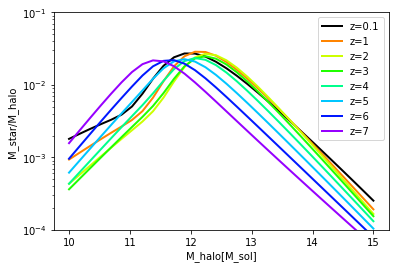

In [167]:
plt.yscale("log")
plt.ylim(0.0001,0.1)
plt.ylabel("M_star/M_halo")
plt.xlabel("M_halo[M_sol]")

x_vals = np.linspace(10,15,30)
plt.plot(x_vals, calc_mass([np.power(10,x_vals)],0.1)[0]/10**x_vals, c="black", label="z=0.1", lw= 2)
for z in range(1,8):
    plt.plot(x_vals, calc_mass([np.power(10,x_vals)],z)[0]/10**x_vals, c=cmap(z/8), label="z="+str(z), lw = 2)
plt.legend()
plt.savefig("old_star_mass_function.pdf")

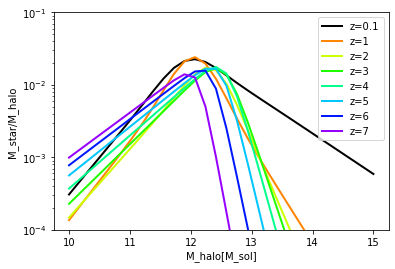

In [168]:
plt.yscale("log")
plt.ylim(0.0001,0.1)
plt.ylabel("M_star/M_halo")
plt.xlabel("M_halo[M_sol]")

x_vals = np.linspace(10,15,30)
plt.plot(x_vals, calc_mass2([np.power(10,x_vals)],0.1)[0]/10**x_vals, c="black", label="z=0.1", lw= 2)
for z in range(1,8):
    plt.plot(x_vals, calc_mass2([np.power(10,x_vals)],z)[0]/10**x_vals, c=cmap(z/8), label="z="+str(z), lw= 2)
plt.legend()
plt.savefig("new_star_mass_function.pdf")    

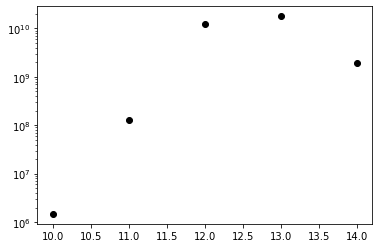

In [102]:
for x in np.linspace(10,15,30):
    plt.scatter(x, calc_mass2([float(10**x)],2)[0], c="black") 

In [79]:
r = 10e+45
print(calc_mass([r],2)[0])
print(calc_mass2([r],5)[0])
#these should probably agree.....

385026474263.4287
1.5192606063347387e+33


In [67]:
epsilon2(2)+log10_m_2(2)

41.11000146353096

In [47]:
print(f(0,2))

0.25000267251475267


In [68]:
log10_epsilon(2)+log10_m_1(2)

10.263449790865154

In [210]:
f = open("redshift.dat", "r")
redshift = []
for line in f:
    if("DD0057" in line): print(line)
    r = float(line.split("=")[-1])
    r = math.trunc(r*1000)/1000
    redshift.append(r)
print(redshift[::-1])

DD0057/output_0057:CosmologyCurrentRedshift    = 12.841682882839

[5.999, 6.001, 6.031, 6.06, 6.09, 6.12, 6.151, 6.181, 6.212, 6.244, 6.276, 6.308, 6.34, 6.373, 6.407, 6.44, 6.474, 6.509, 6.543, 6.579, 6.614, 6.65, 6.687, 6.724, 6.761, 6.799, 6.837, 6.876, 6.915, 6.955, 6.995, 7.036, 7.077, 7.119, 7.153, 7.161, 7.161, 7.165, 7.204, 7.247, 7.291, 7.336, 7.381, 7.427, 7.473, 7.52, 7.568, 7.617, 7.666, 7.716, 7.766, 7.817, 7.86, 7.869, 7.922, 7.976, 8.03, 8.085, 8.141, 8.198, 8.256, 8.315, 8.375, 8.435, 8.497, 8.56, 8.623, 8.688, 8.754, 8.821, 8.889, 8.958, 9.029, 9.101, 9.174, 9.249, 9.324, 9.402, 9.48, 9.561, 9.642, 9.726, 9.811, 9.898, 9.986, 10.076, 10.169, 10.263, 10.359, 10.457, 10.557, 10.66, 10.765, 10.872, 10.982, 11.094, 11.209, 11.327, 11.448, 11.571, 11.698, 11.828, 11.961, 12.098, 12.239, 12.383, 12.532, 12.684, 12.841, 13.003, 13.169, 13.34, 13.517, 13.699, 13.887, 14.081, 14.282, 14.489, 14.703, 14.926, 16.746, 17.048, 17.363, 17.693, 18.038, 18.399, 18.777, 19.175, 19.593,